In [1]:
!pip install --quiet git+https://github.com/Australian-Text-Analytics-Platform/atap_widgets.git@a93db3674590320bf5de61748641c20d05fb9c9f

In [1]:
# just pathing - ignore this
import os
while  not 'juxtorpus' in os.listdir():
    os.chdir('../')
assert 'juxtorpus' in os.listdir(), f"Working directory should be at juxtorpus. But at {os.getcwd()}"
f"Working directory: {os.getcwd()}"

'Working directory: /Users/mily/Workspace/SIH_PIPE/ent-juxtorpus'

# Australian Text Analytics Platform (ATAP)
The Australian Text Analytics Platform aims to bring computational text analysis to the hands of students and researchers with little coding experience through easy to use widgets and library of functions on jupyter notebooks.

### 1. Create a Corpus

In [2]:
import pandas as pd
from juxtorpus.corpus import Corpus

corpus = Corpus.from_dataframe(pd.read_excel("notebooks/workshops/A.debate_clean.xlsx"), col_doc='text')

In [3]:
corpus.summary()

,
Name,asparagus-honeybee
Parent,
Corpus Type,Corpus
Number of Documents,118
Number of Total Words,9792
Size of Vocabulary,1635
mean Words per Document,82
min Words per Document,1
max Words per Document,557
metas,"text_id, speaker, role"


There are about 118 documents and we can see that the mean number of words are only 82 so these are all short relatively short documents.

Let's quickly see what this corpus is about.

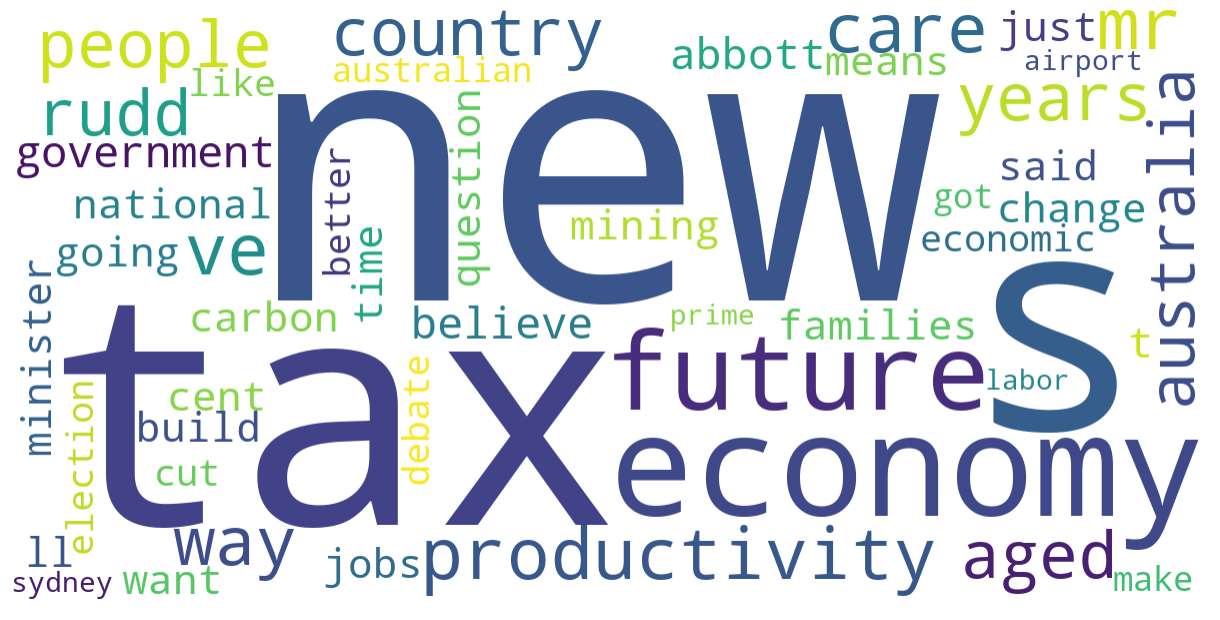

In [4]:
corpus.viz.wordcloud('tfidf')

# Concordance
Concordance is one of the linguistic tools under ATAP. **It lets you visualise a context window around a target word or words.**

Let's see how we can use it after creating a `Corpus`.

In [5]:
from atap_widgets.concordance import ConcordanceLoader

concordance = ConcordanceLoader(type='corpus', df_input=corpus)

In [6]:
concordance.show()